In [1]:
freq = 15

In [2]:
import codigo
from codigo import utils
from codigo import model_LSTM
from codigo import model_utils
from cg_ega.cg_ega import CG_EGA

In [3]:
import pandas as pd
import numpy as np
pd.set_option('mode.chained_assignment',None)
import matplotlib.pyplot as plt
import seaborn as sns
import math

%matplotlib inline

In [4]:
import tensorflow as tf
from tensorflow import keras

In [5]:
with open('dataset/generado/dataset15min/array_Xtest.npy', 'rb') as f:
    array_Xtest = np.load(f)

In [6]:
len(array_Xtest)

436603

In [7]:
with open('dataset/generado/dataset15min/array_Ytest.npy', 'rb') as f:
    array_Ytest = np.load(f)

In [8]:
len(array_Ytest)

436603

In [9]:
model = keras.models.load_model('modelos/modeloGeneral_completo/vanilla_NO_dropout.h5')

In [10]:
from pickle import load
scalerGlucosa = load(open('dataset/generado/scalerGlucosa.scaler', 'rb'))

# Predicción de todo el conjunto de pruebas generales

In [11]:
len(array_Ytest)

436603

13644/13644 [==============================] - 114s 8ms/step


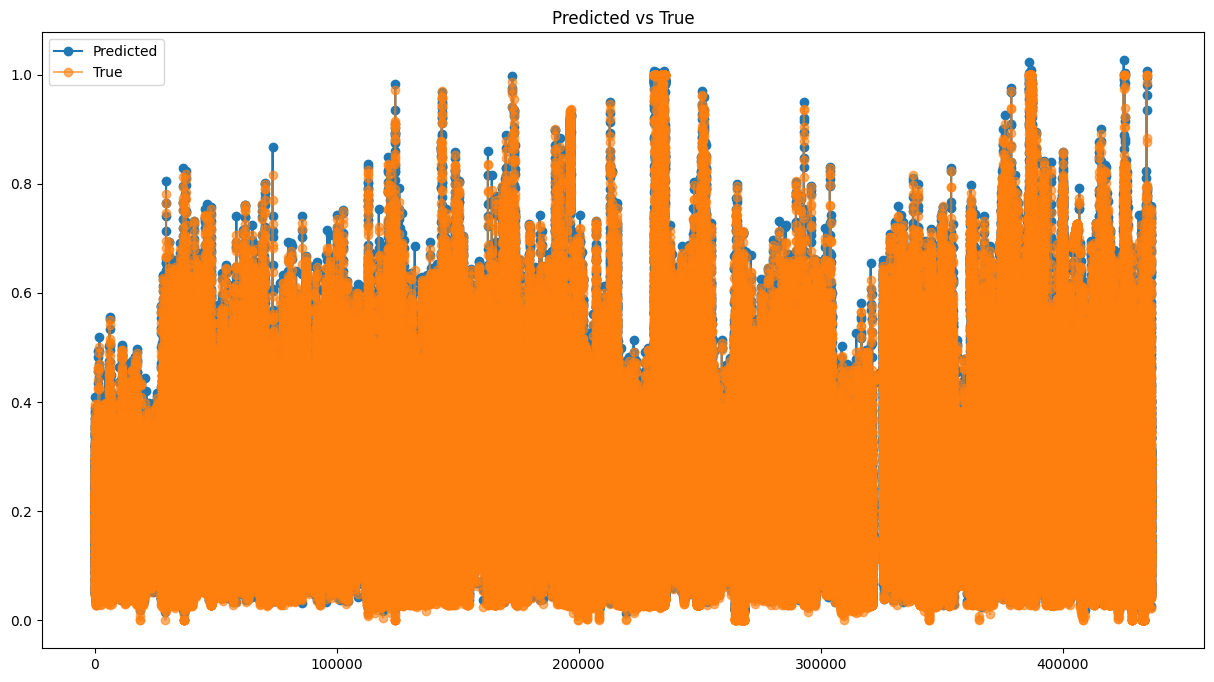

In [12]:
yhat = model.predict(array_Xtest)
model_utils.plotPredicted(yhat,array_Ytest)

In [13]:
model_utils.forecast_accuracy(yhat,array_Ytest)

{'mae': 0.011759389290426005,
 'mse': 0.016918381087938857,
 'rmse': 0.0002862316186367272}

In [14]:
yhat_scaled=scalerGlucosa.inverse_transform(yhat)
yhat_df = pd.DataFrame(yhat_scaled, columns=['Glucose level'])
yhat_df

Glucose level
0          143.793228
1          139.439194
2          141.066147
3          138.593201
4          152.297913
...               ...
436598     125.878899
436599     162.378204
436600     202.755386
436601     205.779480
436602     232.253281

[436603 rows x 1 columns]

In [15]:
array_Ytest_scaled=scalerGlucosa.inverse_transform(array_Ytest)
array_Ytest_df = pd.DataFrame(array_Ytest_scaled, columns=['Glucose level'])
array_Ytest_df

Glucose level
0               141.0
1               140.0
2               139.0
3               145.0
4               159.0
...               ...
436598          137.0
436599          177.0
436600          198.0
436601          216.0
436602          233.0

[436603 rows x 1 columns]

In [16]:
dfPlot=pd.DataFrame()
dfPlot['y_true']=array_Ytest_df['Glucose level']
dfPlot['y_pred']=yhat_df['Glucose level']
dfPlot.index=pd.date_range("2023-01-01", periods=len(array_Ytest), freq="15min")
dfPlot

y_true      y_pred
2023-01-01 00:00:00   141.0  143.793228
2023-01-01 00:15:00   140.0  139.439194
2023-01-01 00:30:00   139.0  141.066147
2023-01-01 00:45:00   145.0  138.593201
2023-01-01 01:00:00   159.0  152.297913
...                     ...         ...
2035-06-14 21:30:00   137.0  125.878899
2035-06-14 21:45:00   177.0  162.378204
2035-06-14 22:00:00   198.0  202.755386
2035-06-14 22:15:00   216.0  205.779480
2035-06-14 22:30:00   233.0  232.253281

[436603 rows x 2 columns]

AP, BE, EP: (0.9844091415064521, 0.012485055038685118, 0.0031058034548627814)


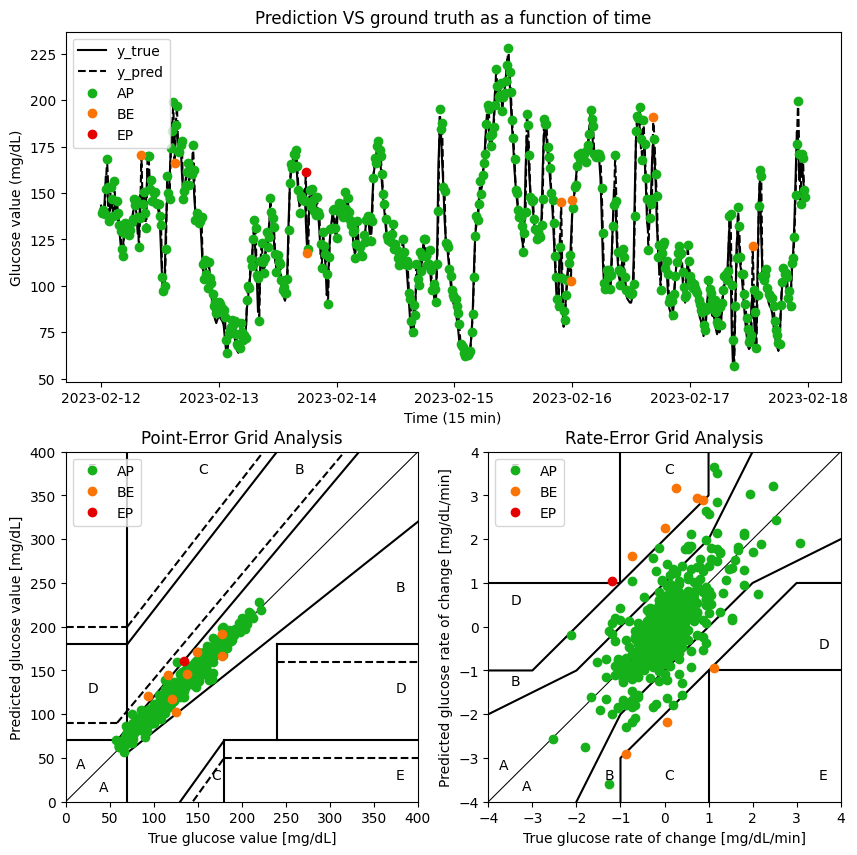

In [17]:
cg_ega = CG_EGA(dfPlot, 15)
print("AP, BE, EP:", cg_ega.reduced())
cg_ega.plot(day=5)

In [18]:
cg_ega.per_sample()

datetime  y_true      y_pred   dy_true   dy_pred CG_EGA  \
0      2023-02-12 00:00:00   141.0  143.793228       NaN       NaN    NaN   
1      2023-02-12 00:15:00   140.0  139.439194 -0.066667 -0.290269     AP   
2      2023-02-12 00:30:00   139.0  141.066147 -0.066667  0.108464     AP   
3      2023-02-12 00:45:00   145.0  138.593201  0.400000 -0.164863     AP   
4      2023-02-12 01:00:00   159.0  152.297913  0.933333  0.913647     AP   
...                    ...     ...         ...       ...       ...    ...   
436598 2035-07-26 21:30:00   137.0  125.878899  2.333333  2.350717     AP   
436599 2035-07-26 21:45:00   177.0  162.378204  2.666667  2.433287     AP   
436600 2035-07-26 22:00:00   198.0  202.755386  1.400000  2.691812     AP   
436601 2035-07-26 22:15:00   216.0  205.779480  1.200000  0.201606     AP   
436602 2035-07-26 22:30:00   233.0  232.253281  1.133333  1.764920     AP   

       P_EGA R_EGA  
0        NaN   NaN  
1          A     A  
2          A     A  
3          A     A  
4          A     A  
...      ...   ...  
436598     A     A  
436599     A     A  
436600     A     A  
436601     A     A  
436602     A     A  

[436603 rows x 8 columns]

# Predicción a 30 min del conjunto de pruebas generales

In [19]:
lenHorizonte=2
XTest=[]
YTest=[]
for i in range(lenHorizonte):
    XTest.append(array_Xtest[i]) 
    YTest.append(array_Ytest[i]) 
XTest=np.reshape(XTest, (lenHorizonte, array_Xtest.shape[1],array_Xtest.shape[2]))

df_YTest = pd.DataFrame(YTest, columns=['Glucose level True'])

YTest_scaled=scalerGlucosa.inverse_transform(YTest)
df_YTest_scaled = pd.DataFrame(YTest_scaled, columns=['Glucose level True']) 

In [20]:
yhat = model.predict(XTest)
df_glucose = pd.DataFrame(yhat, columns=['Glucose level Predict'])
df_glucose['Glucose level True']=df_YTest['Glucose level True']
df_glucose.head()

1/1 [==============================] - 0s 43ms/step


Glucose level Predict  Glucose level True
0               0.225637            0.219565
1               0.216172            0.217391

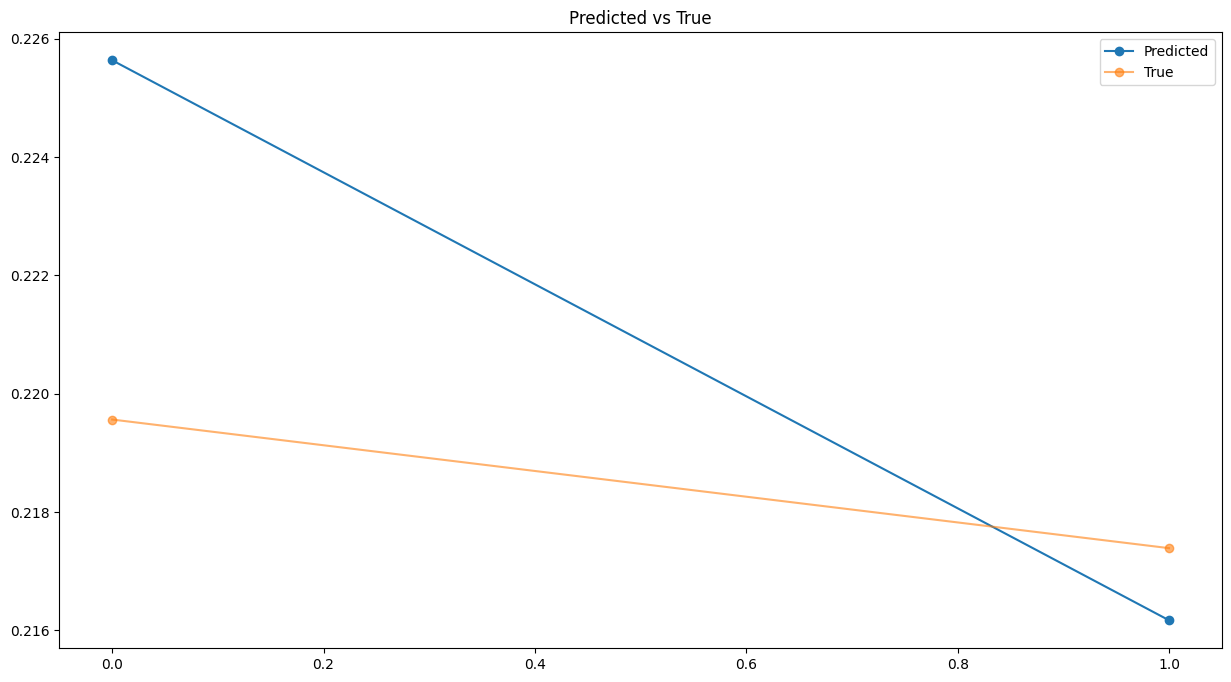

{'mae': 0.003645682075749279,
 'mse': 0.004379408813423763,
 'rmse': 1.9179221555093726e-05}

In [21]:
model_utils.plotPredicted(yhat,YTest)
model_utils.forecast_accuracy(yhat,YTest)

In [22]:
yhat_scaled=scalerGlucosa.inverse_transform(yhat)
df_glucose = pd.DataFrame(yhat_scaled, columns=['Glucose level Predict'])
df_glucose['Glucose level True']=df_YTest_scaled['Glucose level True']
df_glucose.head()

Glucose level Predict  Glucose level True
0             143.793243               141.0
1             139.439209               140.0

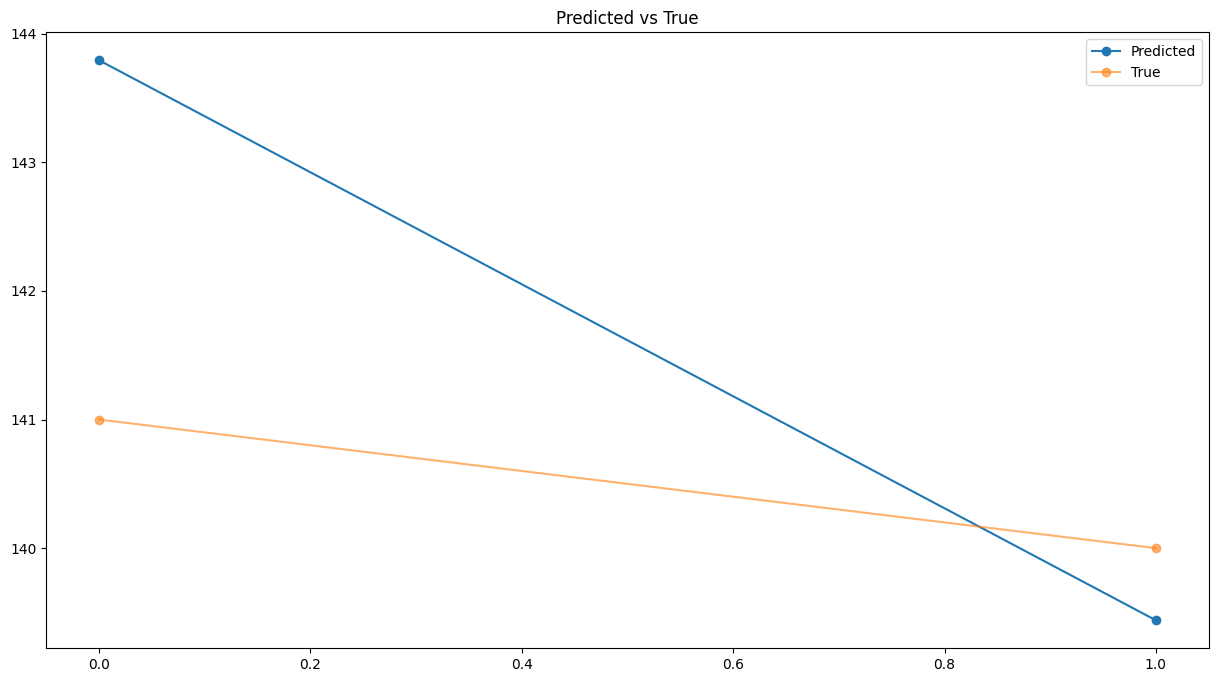

{'mae': 1.6770172119140625,
 'mse': 2.0145341025502557,
 'rmse': 4.058347650337964}

In [23]:
model_utils.plotPredicted(yhat_scaled,YTest_scaled)
model_utils.forecast_accuracy(yhat_scaled,YTest_scaled)

# Predicción sobre predicción a 30 min del conjunto de pruebas generales

In [24]:
yhat=model_utils.predictionOverPrediction(XTest,model)
df_yhat = pd.DataFrame(yhat, columns=['Glucose level Predict'])
df_yhat.head()

df_glucose = pd.DataFrame(yhat, columns=['Glucose level Predict'])
df_glucose['Glucose level True']=df_YTest['Glucose level True']
df_glucose.head()

1/1 [==============================] - 0s 29ms/step


Glucose level Predict  Glucose level True
0               0.225637            0.219565
1               0.228347            0.217391

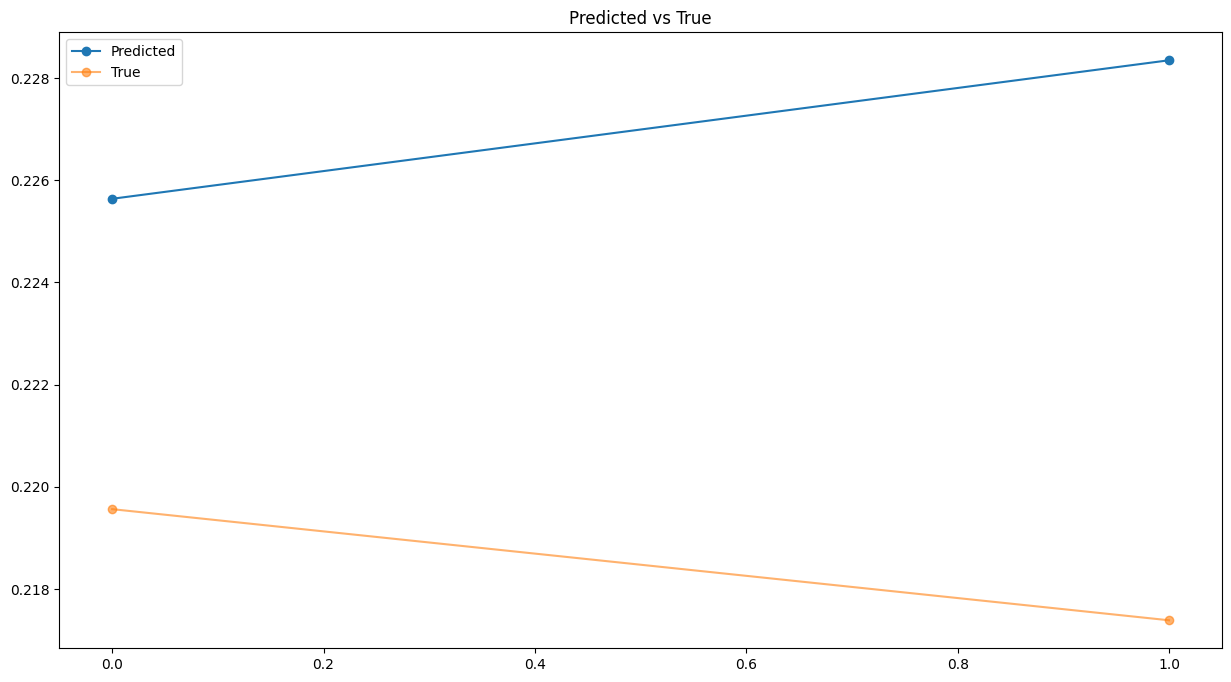

{'mae': 0.008514018421587721,
 'mse': 0.008857242849335277,
 'rmse': 7.84507508921009e-05}

In [25]:
model_utils.plotPredicted(yhat,YTest)
model_utils.forecast_accuracy(yhat,YTest)

In [26]:
yhat_scaled=scalerGlucosa.inverse_transform(df_yhat) 

df_glucose = pd.DataFrame(yhat_scaled, columns=['Glucose level Predict'])
df_glucose['Glucose level True']=df_YTest_scaled['Glucose level True']
df_glucose.head()

Glucose level Predict  Glucose level True
0             143.793243               141.0
1             145.039673               140.0

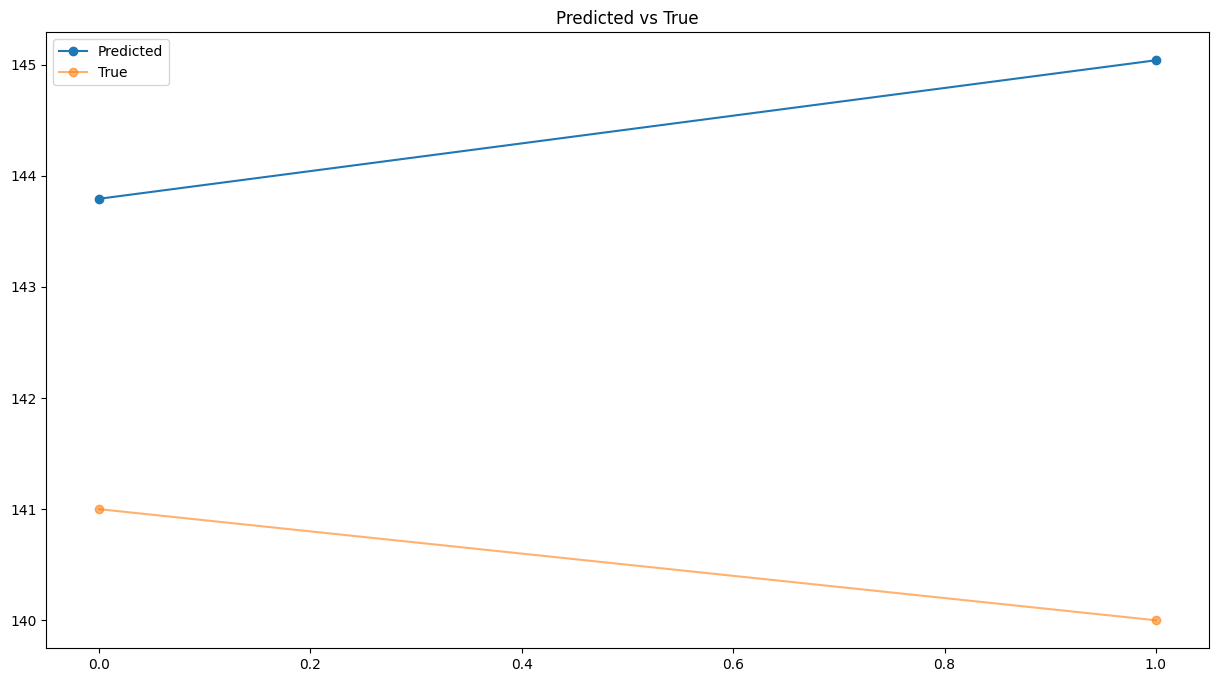

{'mae': 3.9164581298828125,
 'mse': 4.074341123927052,
 'rmse': 16.600255594123155}

In [27]:
model_utils.plotPredicted(yhat_scaled,YTest_scaled)
model_utils.forecast_accuracy(yhat_scaled,YTest_scaled)

# Predicción del conjunto pruebas del paciente 1

In [28]:
with open('dataset/generado/paciente1/array_Xtest.npy', 'rb') as f:
    X = np.load(f) 

In [29]:
with open('dataset/generado/paciente1/array_Ytest.npy', 'rb') as f:
    Y = np.load(f) 

In [30]:
len(X)

191

In [31]:
len(Y)

191

In [32]:
df_Y = pd.DataFrame(Y, columns=['Glucose level True'])

In [33]:
yhat = model.predict(X)
df_glucose = pd.DataFrame(yhat, columns=['Glucose level Predict'])
df_glucose['Glucose level True']=df_Y['Glucose level True']
df_glucose.head()

6/6 [==============================] - 0s 6ms/step


Glucose level Predict  Glucose level True
0               0.228623            0.182609
1               0.142263            0.154348
2               0.159010            0.152174
3               0.154172            0.150000
4               0.150106            0.123913

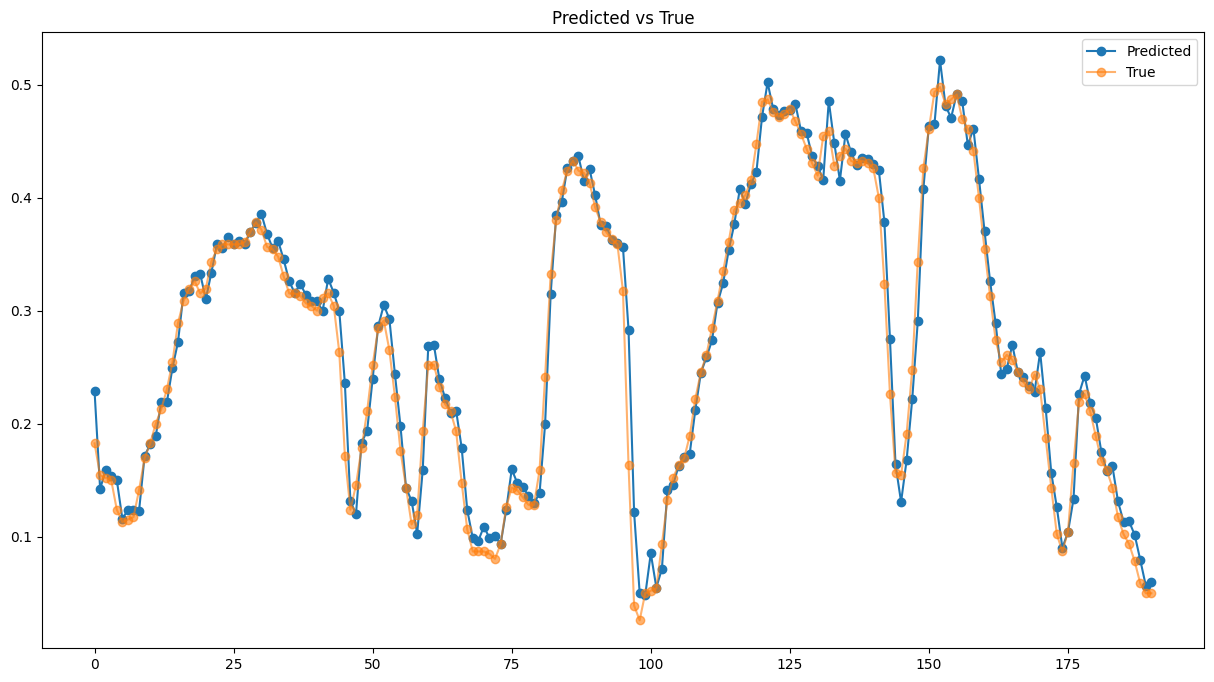

{'mae': 0.0136833955888905,
 'mse': 0.019980160123684823,
 'rmse': 0.0003992067985680851}

In [34]:
model_utils.plotPredicted(yhat,Y)
model_utils.forecast_accuracy(yhat,Y)

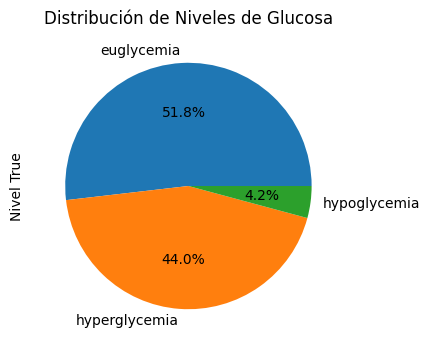

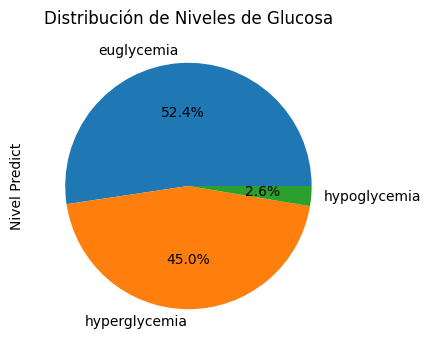

Glucose level True  Nivel True  Glucose level Predict Nivel Predict
0               124.0  euglycemia             145.166519    euglycemia
1               111.0  euglycemia             105.440842    euglycemia
2               110.0  euglycemia             113.144608    euglycemia
3               109.0  euglycemia             110.919266    euglycemia
4                97.0  euglycemia             109.048912    euglycemia

In [35]:
Y_scaled=scalerGlucosa.inverse_transform(Y)
yhat_scaled=scalerGlucosa.inverse_transform(yhat)

df_glucose = pd.DataFrame(Y_scaled, columns=['Glucose level True']) 
df_glucose['Nivel True'] = df_glucose['Glucose level True'].apply(utils.label_LevelBG) 
df_glucose['Nivel True'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='level_label',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

df_glucose['Glucose level Predict']=yhat_scaled
df_glucose['Nivel Predict'] = df_glucose['Glucose level Predict'].apply(utils.label_LevelBG) 

df_glucose['Nivel Predict'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='level_label',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

df_glucose.head()


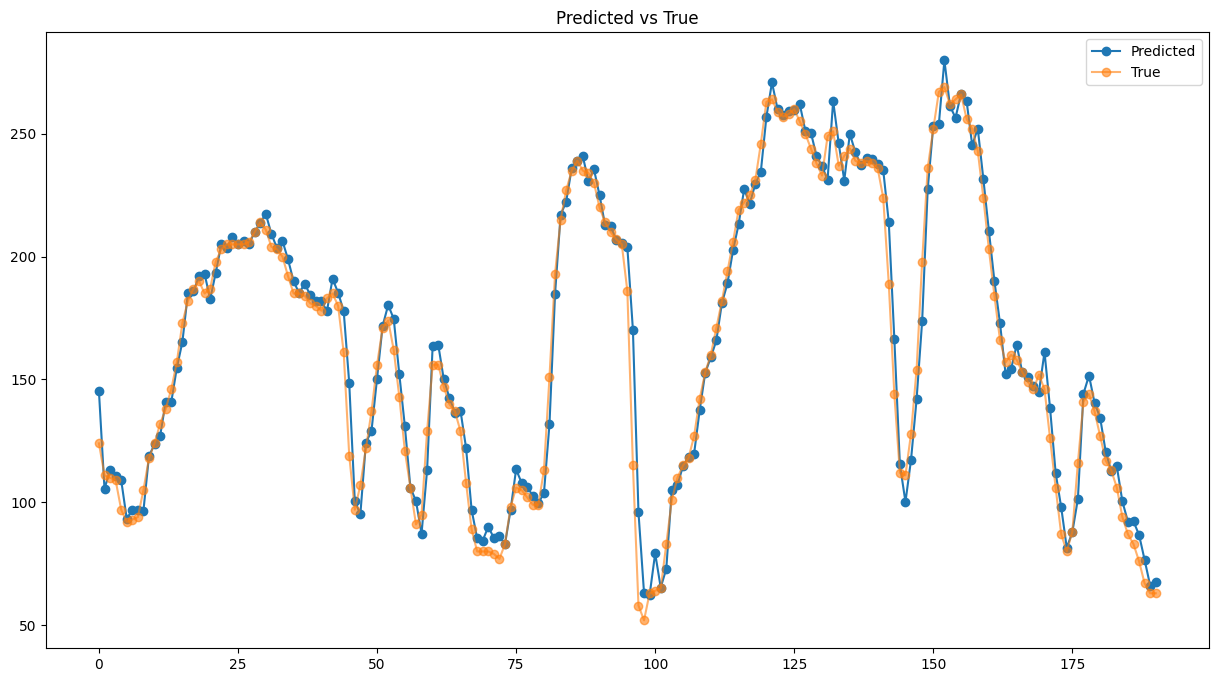

{'mae': 6.294361973308144, 'mse': 9.19087431838441, 'rmse': 84.47217073633807}

In [36]:
model_utils.plotPredicted(yhat_scaled,Y_scaled)
model_utils.forecast_accuracy(yhat_scaled,Y_scaled)

In [37]:
dfPlot=pd.DataFrame()
dfPlot['y_true']=df_glucose['Glucose level True']
dfPlot['y_pred']=df_glucose['Glucose level Predict']
dfPlot.index=pd.date_range("2023-01-01", periods=len(df_glucose['Glucose level True']), freq="15min")
dfPlot

y_true      y_pred
2023-01-01 00:00:00   124.0  145.166519
2023-01-01 00:15:00   111.0  105.440842
2023-01-01 00:30:00   110.0  113.144608
2023-01-01 00:45:00   109.0  110.919266
2023-01-01 01:00:00    97.0  109.048912
...                     ...         ...
2023-01-02 22:30:00    83.0   92.206268
2023-01-02 22:45:00    76.0   86.757080
2023-01-02 23:00:00    67.0   76.564018
2023-01-02 23:15:00    63.0   66.068024
2023-01-02 23:30:00    63.0   67.401421

[191 rows x 2 columns]

AP, BE, EP: (0.9842105263157894, 0.005263157894736842, 0.010526315789473684)


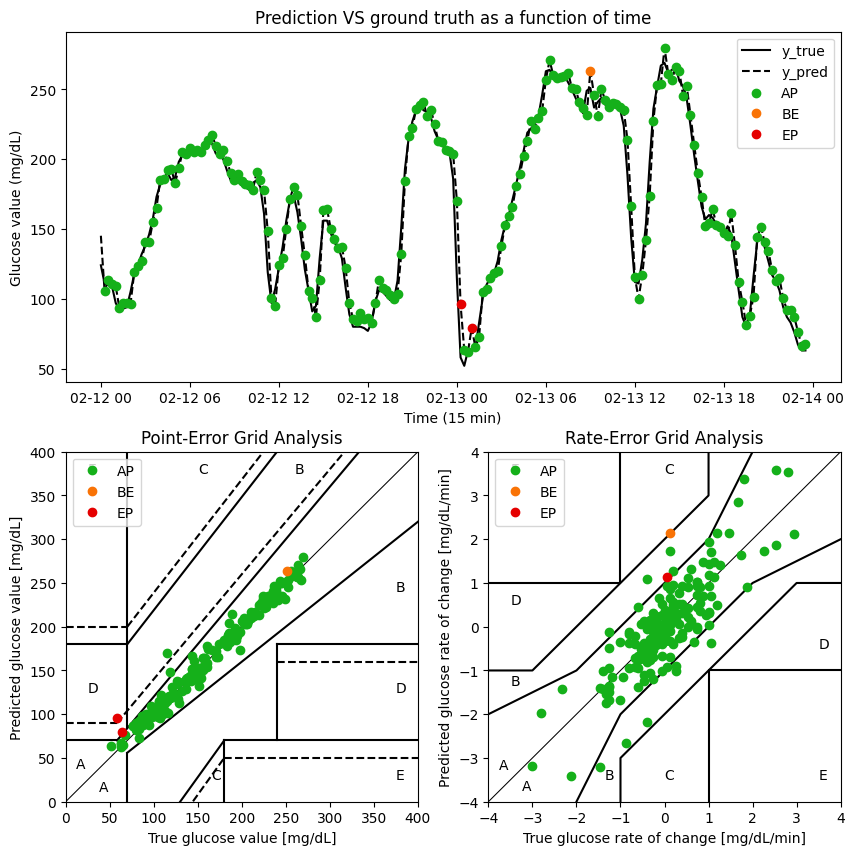

In [38]:
freq = 15
cg_ega = CG_EGA(dfPlot, freq)
print("AP, BE, EP:", cg_ega.reduced())
cg_ega.plot(day=5)

# Predicción del conjunto pruebas del paciente 2

In [39]:
with open('dataset/generado/paciente2/array_Xtest.npy', 'rb') as f:
    X = np.load(f) 

In [40]:
with open('dataset/generado/paciente2/array_Ytest.npy', 'rb') as f:
    Y = np.load(f) 

In [41]:
len(X)

1742

In [42]:
len(Y)

1742

In [43]:
df_Y = pd.DataFrame(Y, columns=['Glucose level True'])

In [44]:
yhat = model.predict(X)
df_glucose = pd.DataFrame(yhat, columns=['Glucose level Predict'])
df_glucose['Glucose level True']=df_Y['Glucose level True']
df_glucose.head()

55/55 [==============================] - 0s 6ms/step


Glucose level Predict  Glucose level True
0               0.372078            0.373913
1               0.391834            0.400000
2               0.420770            0.404348
3               0.404869            0.406522
4               0.416113            0.397826

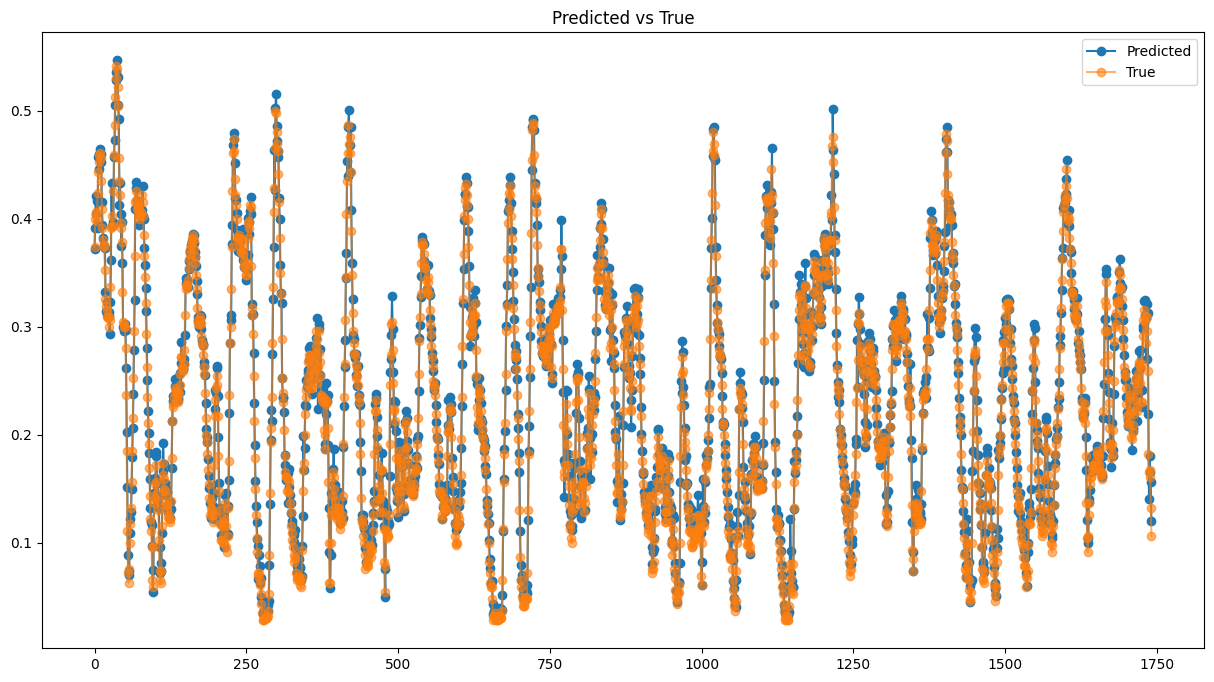

{'mae': 0.009968097044885533,
 'mse': 0.012908637741601111,
 'rmse': 0.00016663292834388863}

In [45]:
model_utils.plotPredicted(yhat,Y)
model_utils.forecast_accuracy(yhat,Y)

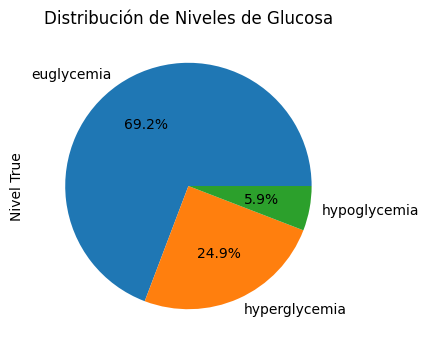

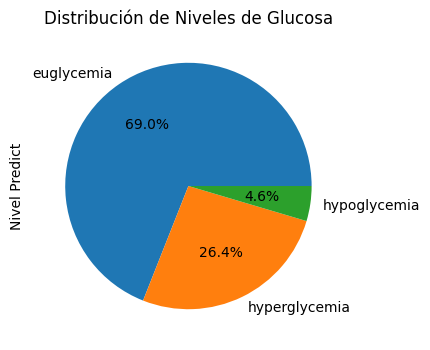

Glucose level True     Nivel True  Glucose level Predict  Nivel Predict
0               212.0  hyperglycemia             211.155716  hyperglycemia
1               224.0  hyperglycemia             220.243744  hyperglycemia
2               226.0  hyperglycemia             233.554138  hyperglycemia
3               227.0  hyperglycemia             226.239777  hyperglycemia
4               223.0  hyperglycemia             231.412140  hyperglycemia

In [46]:
Y_scaled=scalerGlucosa.inverse_transform(Y)
yhat_scaled=scalerGlucosa.inverse_transform(yhat)

df_glucose = pd.DataFrame(Y_scaled, columns=['Glucose level True']) 
df_glucose['Nivel True'] = df_glucose['Glucose level True'].apply(utils.label_LevelBG) 
df_glucose['Nivel True'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='level_label',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

df_glucose['Glucose level Predict']=yhat_scaled
df_glucose['Nivel Predict'] = df_glucose['Glucose level Predict'].apply(utils.label_LevelBG) 

df_glucose['Nivel Predict'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='level_label',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

df_glucose.head()


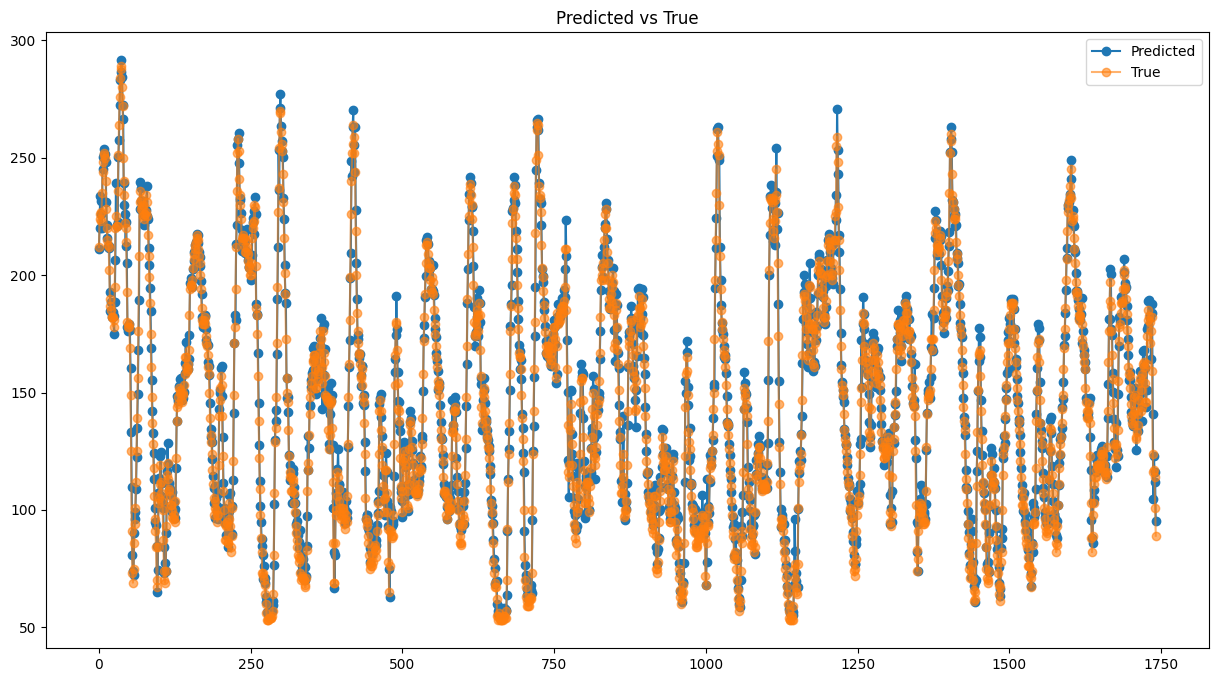

{'mae': 4.585324783850757,
 'mse': 5.937973513617063,
 'rmse': 35.259529448417766}

In [47]:
model_utils.plotPredicted(yhat_scaled,Y_scaled)
model_utils.forecast_accuracy(yhat_scaled,Y_scaled)

In [48]:
dfPlot=pd.DataFrame()
dfPlot['y_true']=df_glucose['Glucose level True']
dfPlot['y_pred']=df_glucose['Glucose level Predict']
dfPlot.index=pd.date_range("2023-01-01", periods=len(df_glucose['Glucose level True']), freq="15min")
dfPlot

y_true      y_pred
2023-01-01 00:00:00   212.0  211.155716
2023-01-01 00:15:00   224.0  220.243744
2023-01-01 00:30:00   226.0  233.554138
2023-01-01 00:45:00   227.0  226.239777
2023-01-01 01:00:00   223.0  231.412140
...                     ...         ...
2023-01-19 02:15:00   116.0  104.852783
2023-01-19 02:30:00   117.0  123.148666
2023-01-19 02:45:00   114.0  115.979515
2023-01-19 03:00:00   101.0  111.975784
2023-01-19 03:15:00    89.0   95.173912

[1742 rows x 2 columns]

AP, BE, EP: (0.9948305571510626, 0.00402067777139575, 0.0011487650775416428)


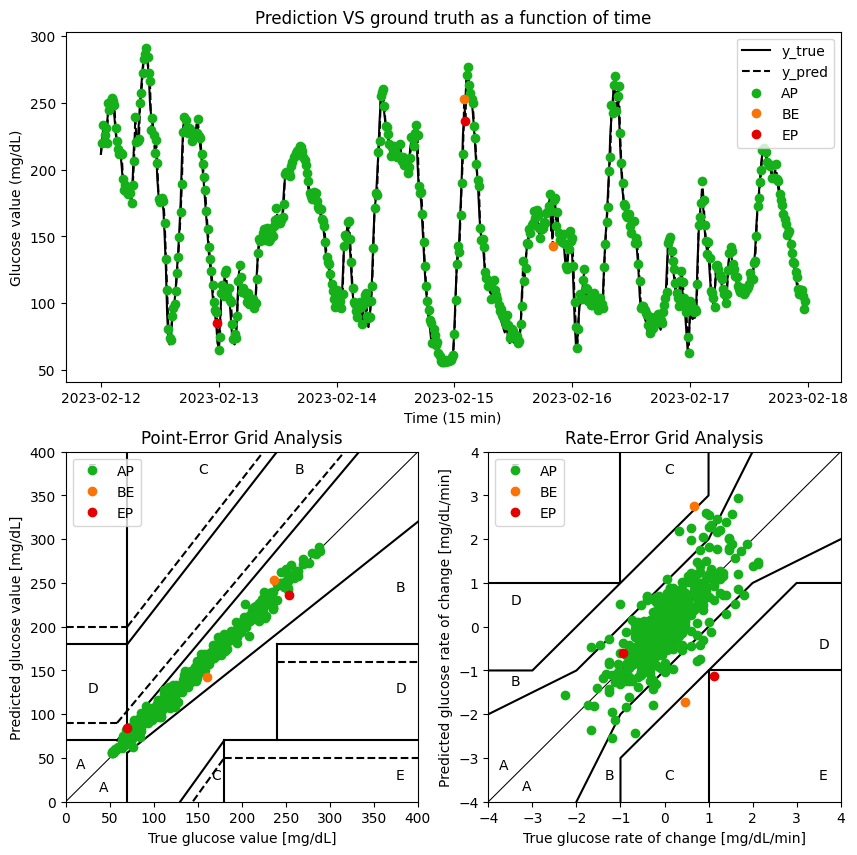

In [49]:
freq = 15
cg_ega = CG_EGA(dfPlot, freq)
print("AP, BE, EP:", cg_ega.reduced())
cg_ega.plot(day=5)

# Predicción del conjunto pruebas del paciente 3

In [50]:
with open('dataset/generado/paciente3/array_Xtest.npy', 'rb') as f:
    X = np.load(f) 

In [51]:
with open('dataset/generado/paciente3/array_Ytest.npy', 'rb') as f:
    Y = np.load(f) 

In [52]:
len(X)

3586

In [53]:
len(Y)

3586

In [54]:
df_Y = pd.DataFrame(Y, columns=['Glucose level True'])

In [55]:
yhat = model.predict(X)
df_glucose = pd.DataFrame(yhat, columns=['Glucose level Predict'])
df_glucose['Glucose level True']=df_Y['Glucose level True']
df_glucose.head()

113/113 [==============================] - 1s 6ms/step


Glucose level Predict  Glucose level True
0               0.270170            0.261858
1               0.238518            0.229051
2               0.205585            0.196245
3               0.173374            0.163439
4               0.141670            0.130632

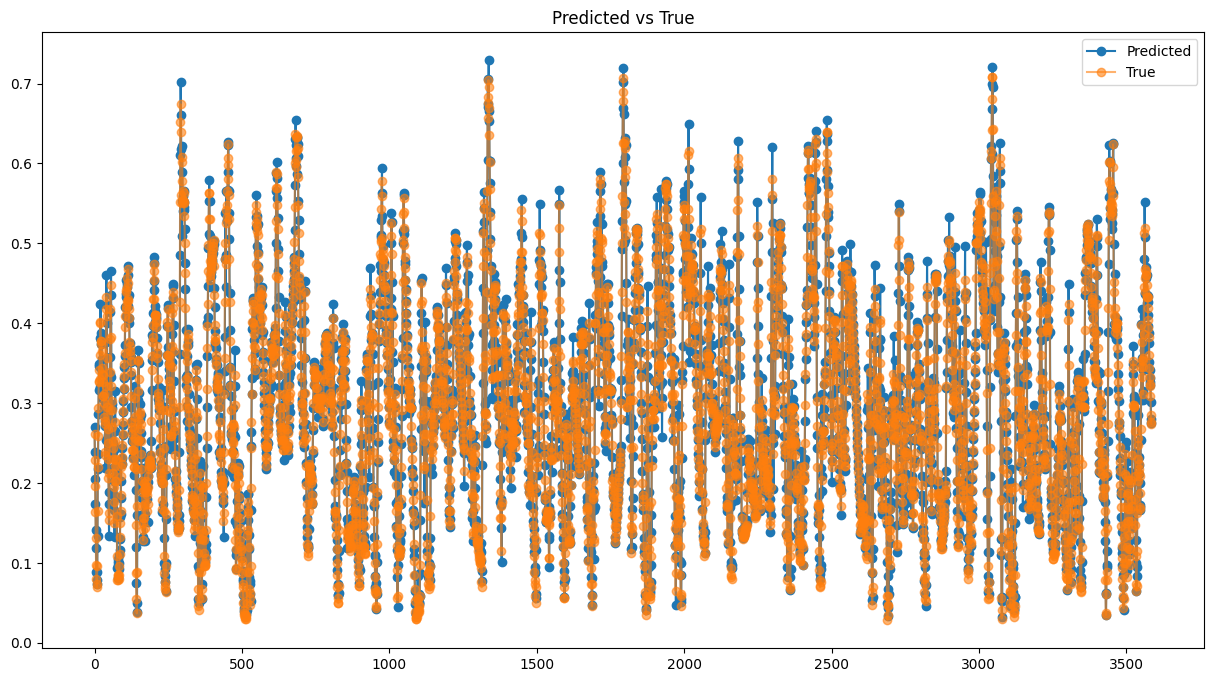

{'mae': 0.01453122136000796,
 'mse': 0.020169199701394518,
 'rmse': 0.00040679661659473275}

In [56]:
model_utils.plotPredicted(yhat,Y)
model_utils.forecast_accuracy(yhat,Y)

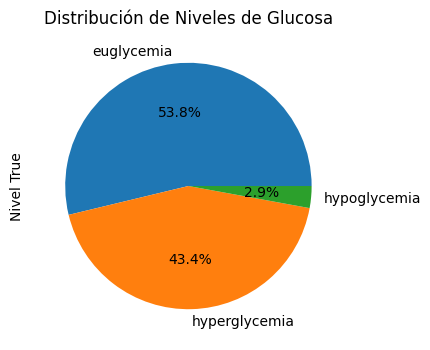

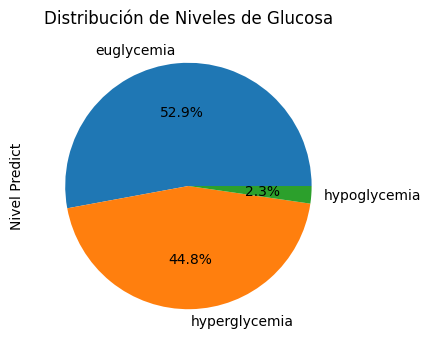

Glucose level True  Nivel True  Glucose level Predict Nivel Predict
0          160.454545  euglycemia             164.278046    euglycemia
1          145.363636  euglycemia             149.718307    euglycemia
2          130.272727  euglycemia             134.569290    euglycemia
3          115.181818  euglycemia             119.751823    euglycemia
4          100.090909  euglycemia             105.168221    euglycemia

In [57]:
Y_scaled=scalerGlucosa.inverse_transform(Y)
yhat_scaled=scalerGlucosa.inverse_transform(yhat)

df_glucose = pd.DataFrame(Y_scaled, columns=['Glucose level True']) 
df_glucose['Nivel True'] = df_glucose['Glucose level True'].apply(utils.label_LevelBG) 
df_glucose['Nivel True'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='level_label',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

df_glucose['Glucose level Predict']=yhat_scaled
df_glucose['Nivel Predict'] = df_glucose['Glucose level Predict'].apply(utils.label_LevelBG) 

df_glucose['Nivel Predict'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='level_label',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

df_glucose.head()


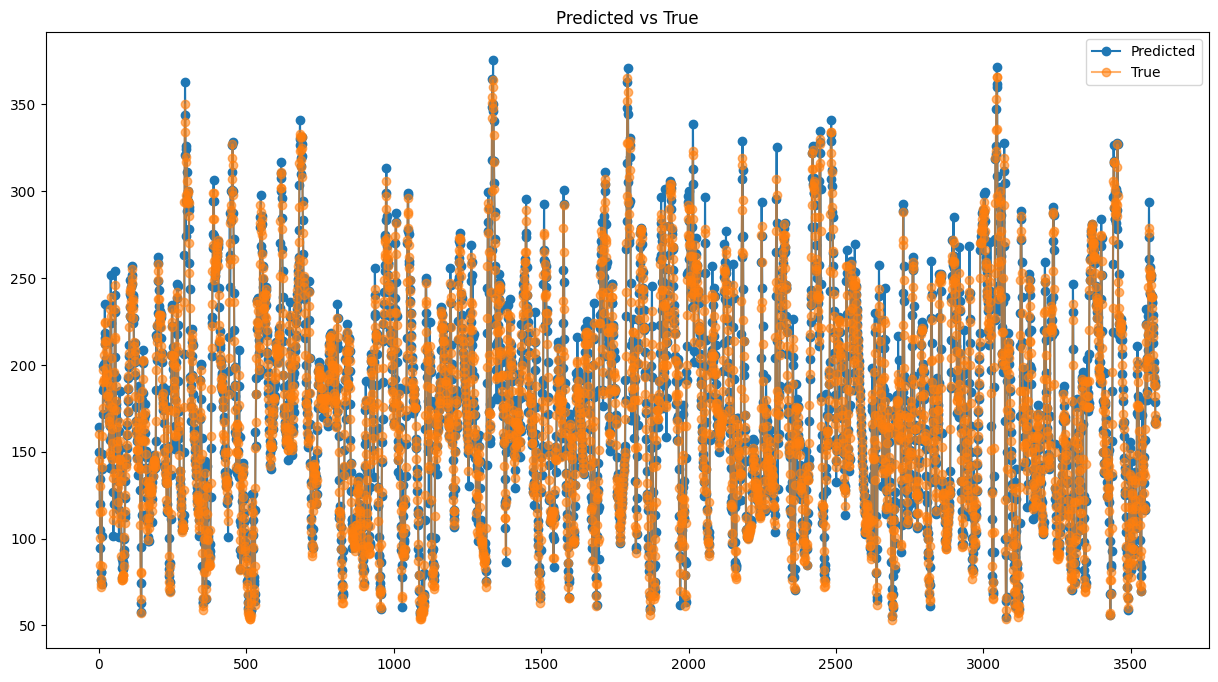

{'mae': 6.684361973983658, 'mse': 9.27783157459213, 'rmse': 86.07815872649866}

In [58]:
model_utils.plotPredicted(yhat_scaled,Y_scaled)
model_utils.forecast_accuracy(yhat_scaled,Y_scaled)

In [59]:
dfPlot=pd.DataFrame()
dfPlot['y_true']=df_glucose['Glucose level True']
dfPlot['y_pred']=df_glucose['Glucose level Predict']
dfPlot.index=pd.date_range("2023-01-01", periods=len(df_glucose['Glucose level True']), freq="15min")
dfPlot

y_true      y_pred
2023-01-01 00:00:00  160.454545  164.278046
2023-01-01 00:15:00  145.363636  149.718307
2023-01-01 00:30:00  130.272727  134.569290
2023-01-01 00:45:00  115.181818  119.751823
2023-01-01 01:00:00  100.090909  105.168221
...                         ...         ...
2023-02-07 07:15:00  188.000000  188.610779
2023-02-07 07:30:00  182.000000  190.148926
2023-02-07 07:45:00  171.000000  178.906815
2023-02-07 08:00:00  167.000000  166.673080
2023-02-07 08:15:00  166.000000  169.127350

[3586 rows x 2 columns]

AP, BE, EP: (0.9718270571827057, 0.023709902370990237, 0.004463040446304045)


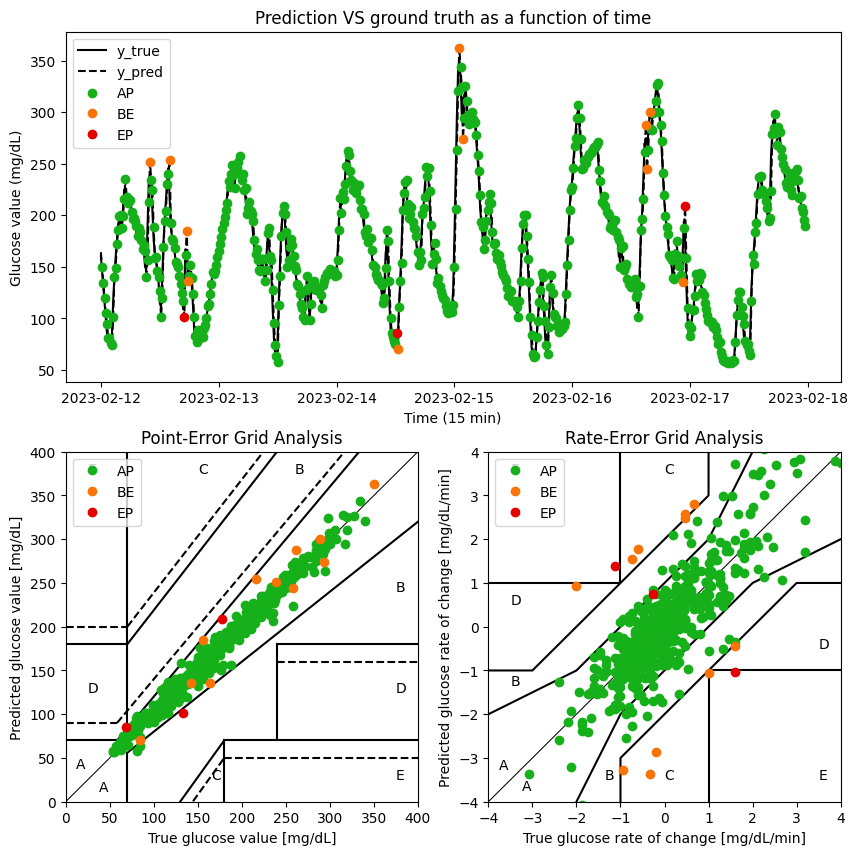

In [60]:
freq = 15
cg_ega = CG_EGA(dfPlot, freq)
print("AP, BE, EP:", cg_ega.reduced())
cg_ega.plot(day=5)

# Predicción del conjunto pruebas del paciente 4

In [61]:
with open('dataset/generado/paciente4/array_Xtest.npy', 'rb') as f:
    X = np.load(f) 

In [62]:
with open('dataset/generado/paciente4/array_Ytest.npy', 'rb') as f:
    Y = np.load(f) 

In [63]:
len(X)

6201

In [64]:
len(Y)

6201

In [65]:
df_Y = pd.DataFrame(Y, columns=['Glucose level True'])

In [66]:
yhat = model.predict(X)
df_glucose = pd.DataFrame(yhat, columns=['Glucose level Predict'])
df_glucose['Glucose level True']=df_Y['Glucose level True']
df_glucose.head()

194/194 [==============================] - 1s 6ms/step


Glucose level Predict  Glucose level True
0               0.543898            0.534783
1               0.528654            0.500000
2               0.471049            0.484783
3               0.484256            0.463043
4               0.439111            0.428261

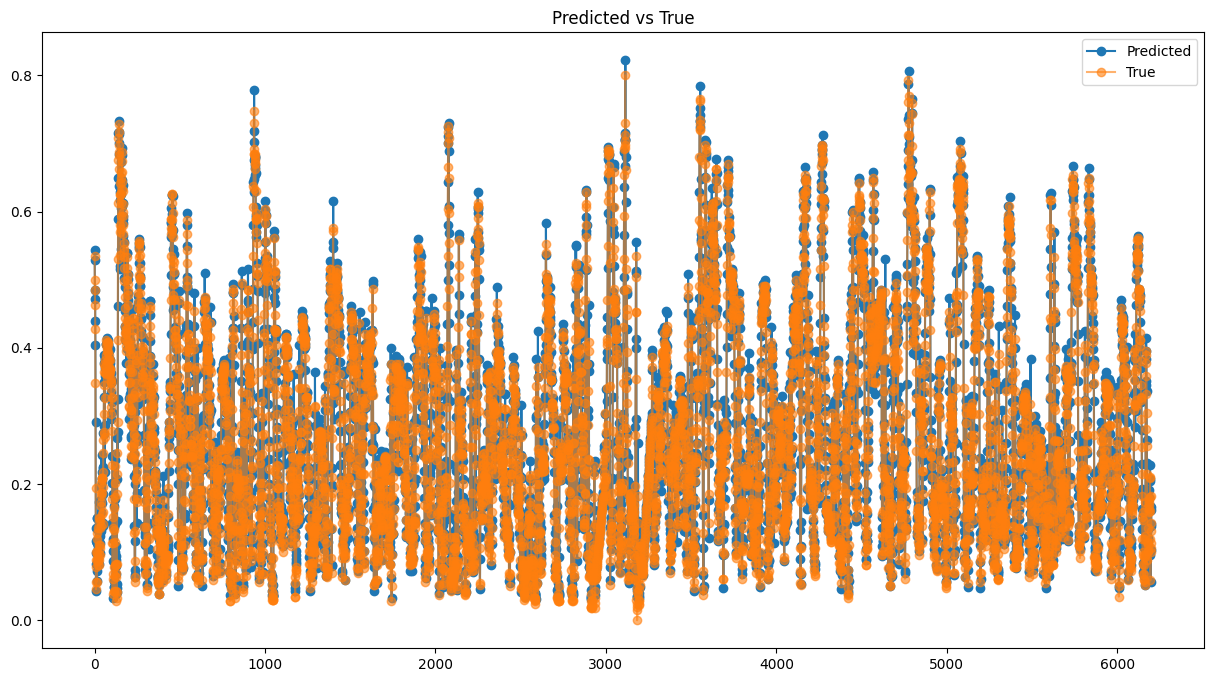

{'mae': 0.016804692458412034,
 'mse': 0.02395279623778424,
 'rmse': 0.0005737364476088107}

In [67]:
model_utils.plotPredicted(yhat,Y)
model_utils.forecast_accuracy(yhat,Y)

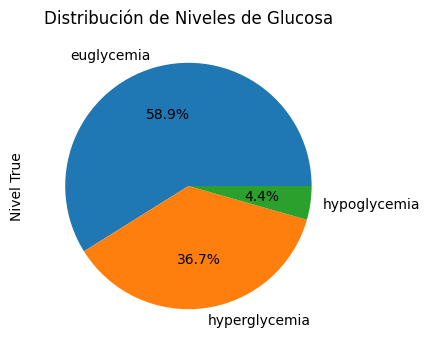

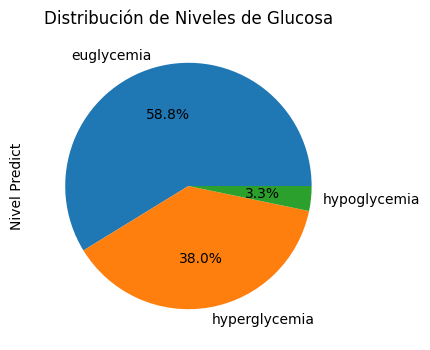

Glucose level True     Nivel True  Glucose level Predict  Nivel Predict
0               286.0  hyperglycemia             290.193146  hyperglycemia
1               270.0  hyperglycemia             283.181030  hyperglycemia
2               263.0  hyperglycemia             256.682770  hyperglycemia
3               253.0  hyperglycemia             262.757751  hyperglycemia
4               237.0  hyperglycemia             241.990936  hyperglycemia

In [68]:
Y_scaled=scalerGlucosa.inverse_transform(Y)
yhat_scaled=scalerGlucosa.inverse_transform(yhat)

df_glucose = pd.DataFrame(Y_scaled, columns=['Glucose level True']) 
df_glucose['Nivel True'] = df_glucose['Glucose level True'].apply(utils.label_LevelBG) 
df_glucose['Nivel True'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='level_label',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

df_glucose['Glucose level Predict']=yhat_scaled
df_glucose['Nivel Predict'] = df_glucose['Glucose level Predict'].apply(utils.label_LevelBG) 

df_glucose['Nivel Predict'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='level_label',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

df_glucose.head()


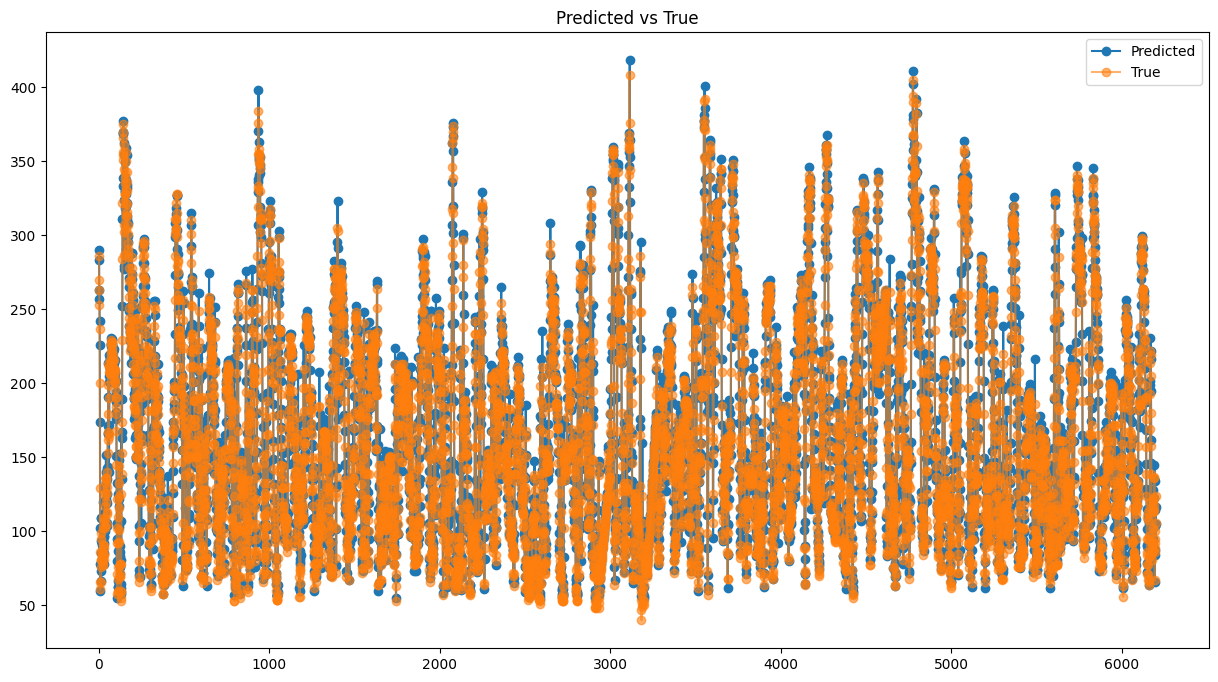

{'mae': 7.73015860362594, 'mse': 11.01828627889842, 'rmse': 121.40263252376121}

In [69]:
model_utils.plotPredicted(yhat_scaled,Y_scaled)
model_utils.forecast_accuracy(yhat_scaled,Y_scaled)

In [70]:
dfPlot=pd.DataFrame()
dfPlot['y_true']=df_glucose['Glucose level True']
dfPlot['y_pred']=df_glucose['Glucose level Predict']
dfPlot.index=pd.date_range("2023-01-01", periods=len(df_glucose['Glucose level True']), freq="15min")
dfPlot

y_true      y_pred
2023-01-01 00:00:00   286.0  290.193146
2023-01-01 00:15:00   270.0  283.181030
2023-01-01 00:30:00   263.0  256.682770
2023-01-01 00:45:00   253.0  262.757751
2023-01-01 01:00:00   237.0  241.990936
...                     ...         ...
2023-03-06 13:00:00   100.0  114.536369
2023-03-06 13:15:00    89.0  103.691933
2023-03-06 13:30:00    92.0   87.662415
2023-03-06 13:45:00   106.0  104.940964
2023-03-06 14:00:00   124.0  116.559341

[6201 rows x 2 columns]

AP, BE, EP: (0.9664516129032258, 0.026451612903225806, 0.0070967741935483875)


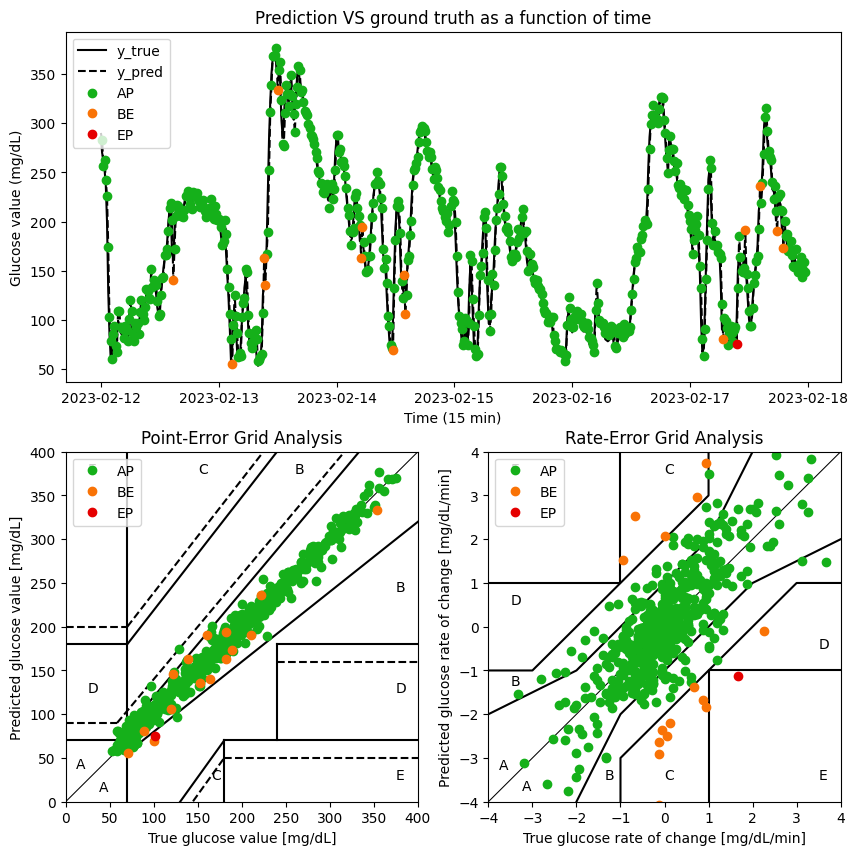

In [71]:
freq = 15
cg_ega = CG_EGA(dfPlot, freq)
print("AP, BE, EP:", cg_ega.reduced())
cg_ega.plot(day=5)